### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
digits = load_digits()

### Shape of the Datasets

In [4]:
print("Images Data Shape : ", digits.data.shape)
print("Labels Data Shape : ", digits.target.shape)

Images Data Shape :  (1797, 64)
Labels Data Shape :  (1797,)


### Displaying some of the Images of the dataset

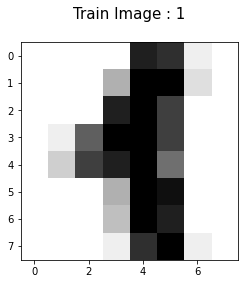

In [5]:
image = digits.data[11]
plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.binary, interpolation="nearest")
plt.title("Train Image : %i\n" % digits.target[11], fontsize=15)
plt.show()

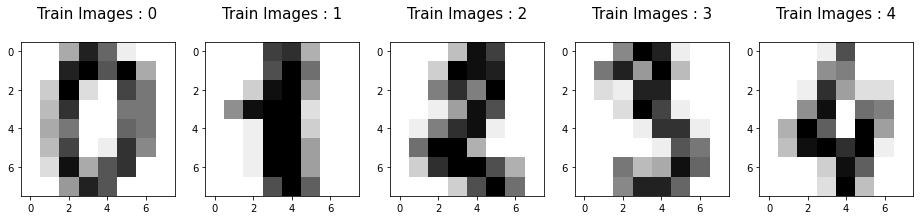

In [6]:
plt.figure(figsize=(16, 6))
for i, (image, label) in enumerate(zip(digits.data[:5], digits.target[:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.binary, interpolation="nearest")
    plt.title("Train Images : %i\n" % label, fontsize=15)

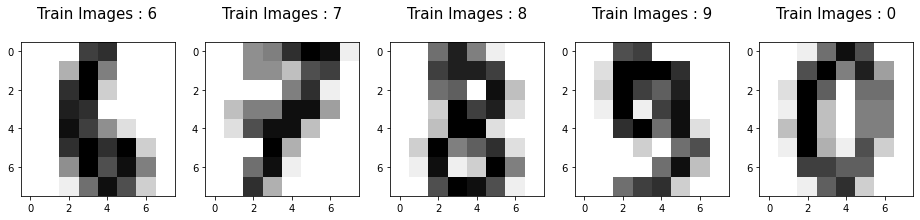

In [7]:
plt.figure(figsize=(16, 6))
for i, (image, label) in enumerate(zip(digits.data[6:11], digits.target[6:11])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.binary, interpolation="nearest")
    plt.title("Train Images : %i\n" % label, fontsize=15)

### Spliting the dataset into Training and Test set 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=12, test_size=0.20
)

In [9]:
print("X Train Shape:", x_train.shape)
print("Y Train Shape:", y_train.shape)

X Train Shape: (1437, 64)
Y Train Shape: (1437,)


In [10]:
print("X Test Shape:", x_test.shape)
print("Y Test Shape:", y_test.shape)

X Test Shape: (360, 64)
Y Test Shape: (360,)


In [11]:
classes = digits.target_names
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

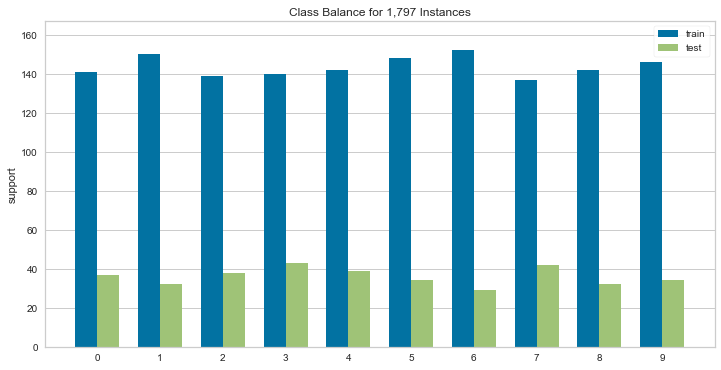

In [12]:
from yellowbrick.target import ClassBalance

plt.figure(figsize=(12, 6))
viz = ClassBalance(labels=classes)
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Support Vector Classifier

In [13]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="poly", random_state=42, probability=True)
svm_clf.fit(x_train, y_train)

SVC(kernel='poly', probability=True, random_state=42)

In [14]:
y_pred = svm_clf.predict(x_test)

**Classification Accuracy:**

In [15]:
clf_accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy of the Model is ", clf_accuracy)

Classification Accuracy of the Model is  0.9944444444444445


**Classification Error:**

In [16]:
clf_error = 1 - clf_accuracy
print("Classification Error of the Model is ", clf_error)

Classification Error of the Model is  0.005555555555555536


**Sensitivity/True Positive Rate/Recall Score**

In [17]:
recall_list = recall_score(y_test, y_pred, average=None)
for itr in range(len(recall_list)):
    print(f"class {classes[itr]} : {recall_list[itr]}")

class 0 : 1.0
class 1 : 1.0
class 2 : 1.0
class 3 : 1.0
class 4 : 1.0
class 5 : 0.9411764705882353
class 6 : 1.0
class 7 : 1.0
class 8 : 1.0
class 9 : 1.0


**Precision Score:**

In [18]:
precision_list = precision_score(y_test, y_pred, average=None)
for itr in range(len(precision_list)):
    print(f"class {classes[itr]} : {precision_list[itr]}")

class 0 : 1.0
class 1 : 1.0
class 2 : 1.0
class 3 : 1.0
class 4 : 1.0
class 5 : 1.0
class 6 : 1.0
class 7 : 1.0
class 8 : 1.0
class 9 : 0.9444444444444444


**F1 Score**

In [19]:
f1_list = f1_score(y_test, y_pred, average=None)
for itr in range(len(f1_list)):
    print(f"class {classes[itr]} : {f1_list[itr]}")

class 0 : 1.0
class 1 : 1.0
class 2 : 1.0
class 3 : 1.0
class 4 : 1.0
class 5 : 0.9696969696969697
class 6 : 1.0
class 7 : 1.0
class 8 : 1.0
class 9 : 0.9714285714285714


**ROC Curve**

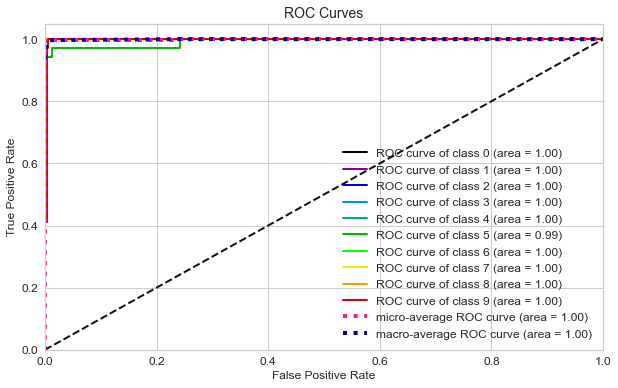

In [20]:
y_probas = svm_clf.predict_proba(x_test)
skplt.metrics.plot_roc(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Precision Recall Curve**

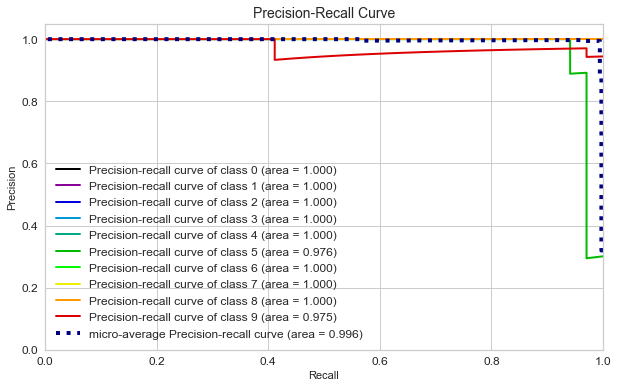

In [21]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

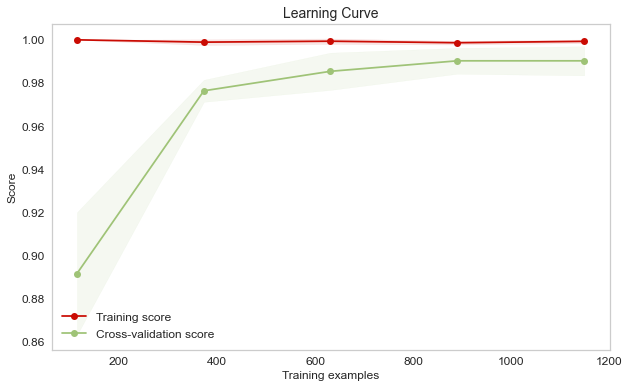

In [22]:
skplt.estimators.plot_learning_curve(
    svm_clf, x_train, y_train, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        43
           4       1.00      1.00      1.00        39
           5       1.00      0.94      0.97        34
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        42
           8       1.00      1.00      1.00        32
           9       0.94      1.00      0.97        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



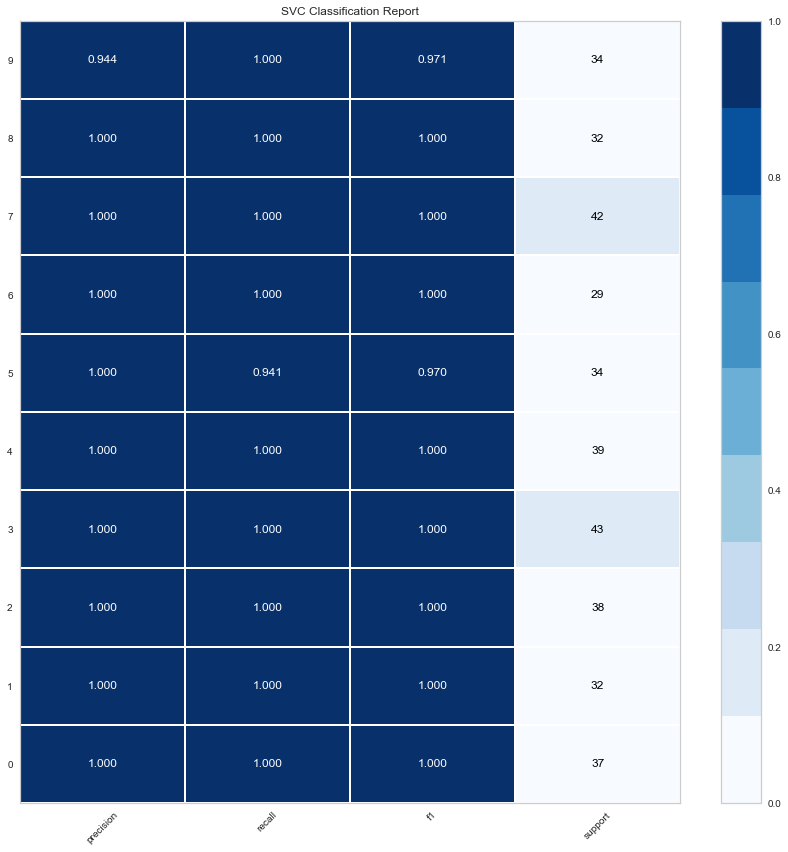

In [24]:
import yellowbrick as yb

plt.figure(figsize=(12, 12))
visualizer = yb.classifier.classification_report(
    svm_clf,
    x_train,
    y_train,
    x_test,
    y_test,
    classes=classes,
    support=True,
    cmap="Blues",
)
plt.show()

**Confusion Matrix**

In [25]:
cm = confusion_matrix(y_test, y_pred)

In [26]:
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  2]
 [ 0  0  0  0  0  0 29  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 34]]


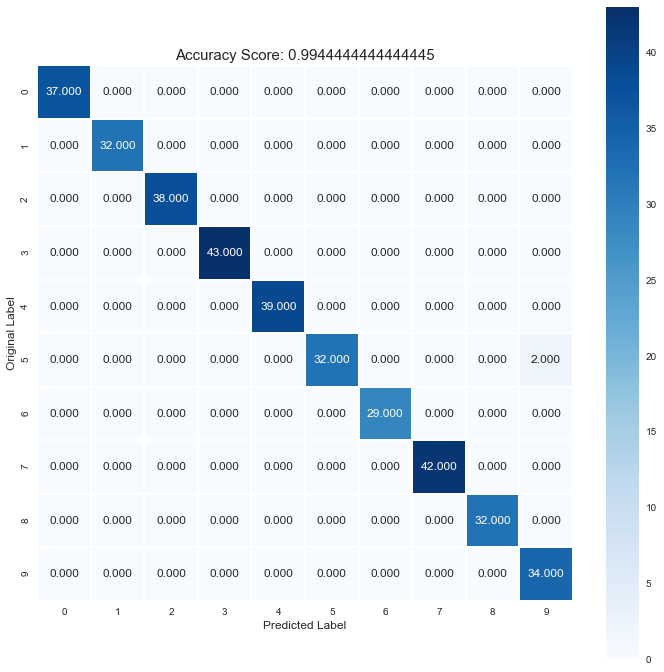

In [27]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=2, square=True, cmap="Blues")
plt.ylabel("Original Label", size=12)
plt.xlabel("Predicted Label", size=12)
all_title = "Accuracy Score: {0}".format(clf_accuracy)
plt.title(all_title, size=15)
plt.show()

**Displaying some of the Predicted Images of the dataset**

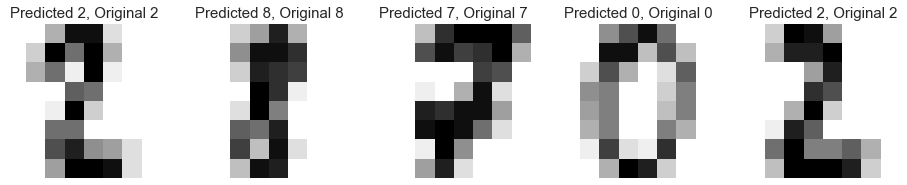

In [28]:
index = 0
classifed = []
for predict, actual in zip(y_pred, y_test):
    if predict == actual:
        classifed.append(index)
    index = index + 1
plt.figure(figsize=(16, 4))
for i, wrong in enumerate(classifed[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray_r)
    plt.axis("off")
    plt.title(
        "Predicted {0}, Original {0}".format(y_pred[wrong], y_test[wrong]), fontsize=15
    )